# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [ ]:
! pip install pandas

In [7]:
#LOAD THE DATA
import pandas as pd
data = pd.read_csv('water_potability.csv')
print (data.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [ ]:
# Filling in the missing rows
data.fillna(data.mean(), inplace=True)

# Chack for missing data
print(data.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


Plot the Data Appropriately

In [ ]:

# generate 2d classification dataset
X = data.drop(columns=['Potability'], axis=1)
y = data['Potability']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_tes = scaler.transform(X_test)

print('Training set size: ', X_train.shape)
print('Testing set size: ', X_test.shape)

Training set size:  (1965, 9)
Testing set size:  (656, 9)


# Each Memeber Defines their model Here

In [ ]:
! pip install tensorflow

In [ ]:
#Model Definition by member 1
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def model_by_Eliane():

  model = Sequential()

  model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001))),
  model.add(Dropout(0.4))

  model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001))),
  model.add(Dropout(0.4))

  model.add(Dense(1, activation='sigmoid', ))

  optimizer = Adam(learning_rate=0.001)
  model.compile(
      optimizer = optimizer,
      loss = 'binary_crossentropy',
      metrics = ['accuracy']
  )

  return model

In [ ]:
#Model Definition by member 2
def model_name_of_student():

  return

In [ ]:
#Model Definition by member 3
def model_name_of_student():

  return

# Start the training Process

Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4824 - loss: 0.8211 - val_accuracy: 0.6427 - val_loss: 0.7123
Epoch 2/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5648 - loss: 0.7619 - val_accuracy: 0.6443 - val_loss: 0.7027
Epoch 3/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5795 - loss: 0.7317 - val_accuracy: 0.6519 - val_loss: 0.6978
Epoch 4/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5859 - loss: 0.7233 - val_accuracy: 0.6504 - val_loss: 0.6890
Epoch 5/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6328 - loss: 0.7041 - val_accuracy: 0.6550 - val_loss: 0.6812
Epoch 6/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6227 - loss: 0.7054 - val_accuracy: 0.6595 - val_loss: 0.6733
Epoch 7/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6202 - loss: 0.7006 - val_accuracy: 0.6656 - val_loss: 0.6694
Epoch 8/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6497 - loss: 0.6770 - val_accuracy: 0.6733 - val_lo

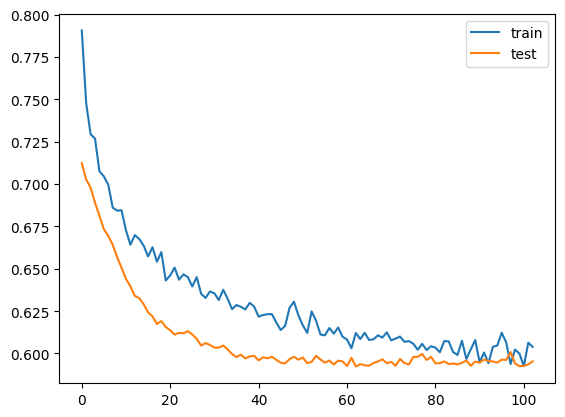

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot


#fit model
model = model_by_Eliane()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=40,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=1000,
    verbose=1,
    callbacks=[early_stopping]
)
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()